In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit, fixed_point

In [2]:
from scipy.ndimage import uniform_filter


# $µ$ data

In [3]:
list_beta=np.round(np.arange(1.1, 2.1, 0.1), 1)

In [4]:
lx=2500
ly=400

In [5]:
m_micro={}
for beta in list_beta:
    m_micro[beta]=pd.read_csv('data_speed_beta/beta%.1f/f_profiles_m.dat'%beta, sep=' ', names=np.arange(lx), index_col=False)

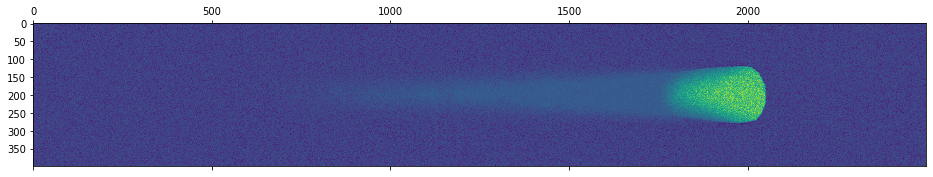

In [6]:
k=11
beta=1.9
plt.matshow(-m_micro[beta].values[ly*k:ly*(k+1),:][:,::-1])

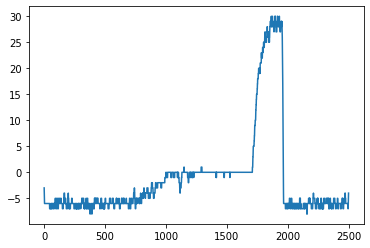

In [7]:
beta=1.4
k=11
prof=-m_micro[beta].values[ly*k:ly*(k+1),:][:,::-1]
avg_prof=uniform_filter(prof, size=7, mode='constant')

plt.plot(avg_prof[200,:])

In [8]:
prof_mid=avg_prof[100,:]
np.where((prof_mid<-1)&(np.roll(prof_mid,-1)>=-1))

(array([], dtype=int64),)

In [11]:
posback={}
posfront={}
poscomet={}

for beta in list_beta:
    posback[beta]=[]
    posfront[beta]=[]
    poscomet[beta]=[]

    for k in range(1,m_micro[beta].shape[0]//ly):
        #print(beta,k)
        prof=np.roll(-m_micro[beta].values[ly*k:ly*(k+1),:][:,::-1],0)
        avg_prof=uniform_filter(prof, size=10, mode='constant')
        prof_mid=avg_prof[200,:]
        m_d=np.max(prof_mid)
        m_0=np.min(prof_mid)
        #poscomet[beta].append(np.where((prof_mid<m_0/2)&(np.roll(prof_mid,-1)>=m_0/2))[0][0])
        posback[beta].append(np.where((prof_mid<m_d/2)&(np.roll(prof_mid,-1)>=m_d/2))[0][0])
        posfront[beta].append(np.where((prof_mid>m_d/2)&(np.roll(prof_mid,-1)<=m_d/2))[0][0])

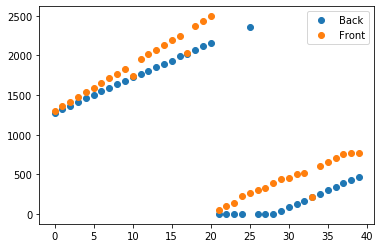

In [15]:
beta=1.2
#plt.plot(poscomet[beta], 'o', label='Comet')
plt.plot(posback[beta], 'o', label='Back')
plt.plot(posfront[beta], 'o', label='Front')

plt.legend()

In [13]:
speedback={}
speedfront={}
speedcomet={}
tmax=10
for beta in list_beta:
    speedfront[beta]=np.polyfit(50*np.arange(1,tmax), posfront[beta][1:tmax], deg=1)[0]
    speedback[beta]=np.polyfit(50*np.arange(1,tmax), posback[beta][1:tmax], deg=1)[0]
    #speedcomet[beta]=np.polyfit(50*np.arange(1,tmax), poscomet[beta][1:tmax], deg=1)[0]

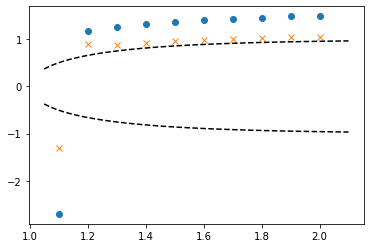

In [14]:
plt.plot(list_beta, [speedfront[beta] for beta in list_beta], 'o')
plt.plot(list_beta, [speedback[beta] for beta in list_beta], 'x')
#plt.plot(list_beta, [speedcomet[beta] for beta in list_beta], 'v')

vec_beta=np.linspace(1.05, 2.1)
fp_beta=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in vec_beta])
plt.plot(vec_beta, fp_beta, 'k--')
plt.plot(vec_beta, -fp_beta, 'k--', label=r'$\mathrm{Theory}$')


# PDE 2d data

In [3]:
list_beta=np.round(np.arange(1.1, 2.1, 0.1), 1)

In [17]:
list_t=np.arange(50, 500, 50)

In [16]:
lx_2d=10000
ly_2d=2000

In [18]:
wd='/users/invites/benvegnen'

In [24]:
list_beta

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ])

In [57]:
m_2d={}
for beta in list_beta:
    m_2d[beta]={}
    for t in list_t:
        try:
            m_2d[beta][t]=np.loadtxt(wd+'/Thesis/AI2D/AI2D_hydro/PDEs_2d_MPI/profiles_speeds/beta%.1f/f_m_t%d.dat'%(beta,t), skiprows=1000, max_rows=1)
        except:
            pass

In [58]:
m_2d[1.8]

{50: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 100: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 150: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 200: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 250: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 300: array([0.932718, 0.932718, 0.932718, ..., 0.932718, 0.932718, 0.932718]),
 350: array([-4.150835, -4.150776, -4.150717, ..., -4.151009, -4.150951,
        -4.150893]),
 400: array([-4.060366, -4.06006 , -4.059752, ..., -4.061281, -4.060977,
        -4.060672]),
 450: array([-3.651499, -3.650214, -3.648926, ..., -3.655341, -3.654063,
        -3.652782])}

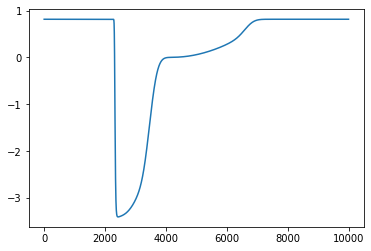

In [67]:
beta=1.4
t=200
plt.plot(m_2d[beta][t])

In [62]:
posfront_2d={}
posback_2d={}
poscomet_2d={}
 
for beta in list_beta:
    posback_2d[beta]=[]
    posfront_2d[beta]=[]
    poscomet_2d[beta]=[]

    for t in list_t:
        try:
            prof_mid=-m_2d[beta][t][::-1]
            m_d=np.max(prof_mid)
            m_0=np.min(prof_mid)
            poscomet_2d[beta].append(np.where((prof_mid<m_0/2)&(np.roll(prof_mid,-1)>=m_0/2))[0][0])
            posback_2d[beta].append(np.where((prof_mid<m_d/2)&(np.roll(prof_mid,-1)>=m_d/2))[0][0])
            posfront_2d[beta].append(np.where((prof_mid>m_d/2)&(np.roll(prof_mid,-1)<=m_d/2))[0][0])
        except:
            pass

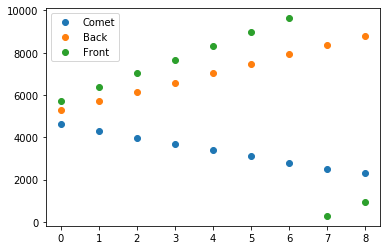

In [63]:
beta=1.4
plt.plot(poscomet_2d[beta], 'o', label='Comet')
plt.plot(posback_2d[beta], 'o', label='Back')
plt.plot(posfront_2d[beta], 'o', label='Front')

plt.legend()

In [64]:
speedback_2d={}
speedfront_2d={}
speedcomet_2d={}
tmax=5
for beta in list_beta:
    try:
        speedfront_2d[beta]=np.polyfit(50*np.arange(1,tmax), posfront_2d[beta][1:tmax], deg=1)[0]
        speedback_2d[beta]=np.polyfit(50*np.arange(1,tmax), posback_2d[beta][1:tmax], deg=1)[0]
        speedcomet_2d[beta]=np.polyfit(50*np.arange(1,tmax), poscomet_2d[beta][1:tmax], deg=1)[0]
    except:
        pass

In [65]:
speedfront_2d

{1.2: 11.645999999999988, 1.4: 12.973999999999984, 1.8: 14.507999999999987}

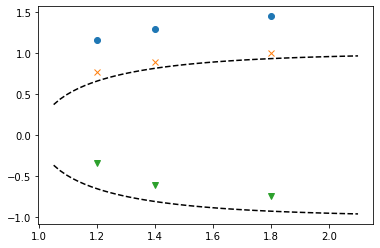

In [66]:
dx=0.1
plt.plot(list(speedfront_2d), [speedfront_2d[beta]*dx for beta in speedfront_2d], 'o')
plt.plot(list(speedback_2d), [speedback_2d[beta]*dx for beta in speedfront_2d], 'x')
plt.plot(list(speedcomet_2d), [speedcomet_2d[beta]*dx for beta in speedfront_2d], 'v')

vec_beta=np.linspace(1.05, 2.1)
fp_beta=np.array([fixed_point(lambda x: np.tanh(beta*x), 0.5) for beta in vec_beta])
plt.plot(vec_beta, fp_beta, 'k--')
plt.plot(vec_beta, -fp_beta, 'k--', label=r'$\mathrm{Theory}$')
